<a href="https://colab.research.google.com/github/sherlockieee/cs113/blob/main/Make_up_work_Session_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-class Work
Two fair six-sided dice are rolled (one green and one orange), with outcomes 
$X$ and 
$Y$ respectively for the green and the orange.



(a) Compute the covariance of $X+Y$ and $X−Y$.

In [ ]:
'''
Var(X) = Var(Y) because they both represent the outcomes of 6-sided dices. 
Cov(X+Y,X-Y) 
= E((X + Y)(X - Y))−E(X+Y)E(X-Y)
= E(X^2 - Y^2) - E(X+Y)E(X-Y)
= E(X^2) - E(Y^2) - (E(X) + E(Y))(E(X) - E(Y))
= E(X^2) - E(Y^2) - E(X)^2 + E(Y)^2
= Var(X) - Var(Y)
= 0
'''

# Write your answer as a number. For example, answer = 0.1. 
answer = 0

(b) Are $X+Y$ and $X−Y$ independent?

In [1]:
'''
No, because Cov(X+Y, X-Y) = 0 doesn't imply they are independent. 
In this case, X+Y is correlated to X-Y but dependent
because we can imagine knowing X+Y is very large => we can deduce that both X and Y must be large => X - Y is small
'''

# Write your answer as 'yes' or 'no'.
# Uncomment one:
#answer = 'yes'
answer = 'no'

### Multinomial distribution 

In [2]:
import scipy.stats as sts
import numpy as np

p = np.array([1/10, 2/10, 3/10, 4/10])  # An unfair 4-sided die
n = 10  # Roll the die 20 times

# Create the distribution
dist = sts.multinomial(n, p)

# Generate random samples. Each sample is a vector of 4 counts
print(f'Three random samples with n = {n}:')
print(dist.rvs(3))

# When we roll the die many times (when n is large), we expect the counts to get
# close to the average counts.
n = 10000
dist = sts.multinomial(n, p)
print(f'\nExpected counts with n = {n}:')
print(n * p)
print(f'\nA random sample with n = {n}:')
print(dist.rvs())

Three random samples with n = 10:
[[1 2 4 3]
 [1 2 1 6]
 [1 5 1 3]]

Expected counts with n = 10000:
[1000. 2000. 3000. 4000.]

A random sample with n = 10000:
[[ 989 1965 3016 4030]]


###Required practice: Student sample


A certain course has $a$ freshmen, 
$b$ sophomores, 
$c$ juniors, and 
$d$ seniors. Let 
$X$ be the number of freshmen and sophomores (total), 
$Y$ be the number of juniors, and 
$Z$ be the number of seniors in a random sample of size 
$n$. All random samples have the same probability.



(a) Find the joint PMF of 
$X,Y,Z$ when sampling with replacement.

In [3]:
'''
This is multinomial distribution => we just need to use the formula
'''

# Write your answer as a symbolic expression in terms of n, a, b, c, and d
# evaluated at (X=x, Y=y, Z=z). For example, answer = n / (a+b+c) * (x+y+z).
from sympy.abc import a, b, c, d, n, x, y, z
from sympy import binomial, factorial
answer = factorial(x + y + z)/(factorial(x)*factorial(y)*factorial(z)) * ((a + b)/(a+b+c+d))**x * (c/(a+b+c+d))**y * (d/(a+b+c+d))**z

(b) Find the joint PMF of ﻿
$X,Y,Z$
 when sampling without replacement.

In [4]:
'''
We are choosing x students from a + b freshmen + sophomores;
y students from c juniors;
and z students from d seniors;
over the sample space of choosing n students out of a+b+c+d students.
'''

# Write your answer as a symbolic expression in terms of n, a, b, c, and d
# evaluated at (X=x, Y=y, Z=z). For example, answer = n / (a+b+c) * (x+y+z).
from sympy.abc import a, b, c, d, n, x, y, z
from sympy import binomial, factorial

answer = binomial(a+b, x) * binomial(c, y) * binomial(d, z)/ binomial(a + b + c + d, n)

###Multivariate Normal distribution
We use `sts.multivariate_normal(mean_vector, covariance_matrix)` to create a Multivariate Normal distribution.



Mean μ:
[-1.5  1.5]
Covariance Σ:
[[1.  0.5]
 [0.5 2. ]]
First random sample:
[-1.59216623  1.51744394]


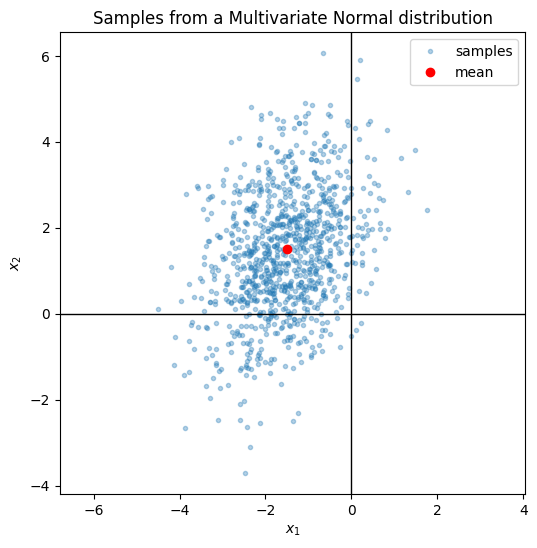

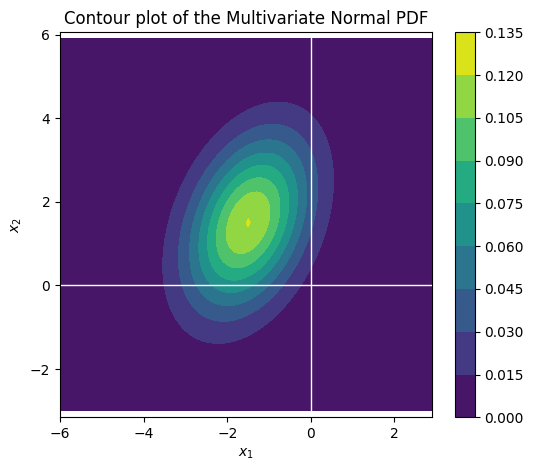

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Create a bivariate (2-dimensional) Normal distribution
mean = np.array([-1.5, 1.5])  # Mean parameter
print('Mean μ:')
print(mean)

cov = np.array([[1.0, 0.5], [0.5, 2.0]])  # Covariance parameter
print('Covariance Σ:')
print(cov)

dist = sts.multivariate_normal(mean, cov)  # The distribution

# Generate 1000 samples from the distribution
samples = dist.rvs(1000)
print('First random sample:')
print(samples[0])

# Plot the samples
plt.figure(figsize=(6, 6))
plt.title('Samples from a Multivariate Normal distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(samples[:, 0], samples[:, 1], '.', alpha=1/3, label='samples')
plt.plot([mean[0]], [mean[1]], 'ro', label='mean')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.show()

# Plot the PDF
plt.figure(figsize=(6, 5))
plt.title('Contour plot of the Multivariate Normal PDF')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
x, y = np.mgrid[-6:3:.1, -3:6:.1]
points = np.dstack((x, y))
plt.contourf(x, y, dist.pdf(points), levels=10)
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)
plt.colorbar()
plt.show()

###Required practice: Birthdays


Let $X$ be the number of distinct birthdays in a group of 110 people (i.e., the number of days in a year such that at least one person in the group has that birthday). Use the usual assumptions: no February 29, all the other 365 days of the year are equally likely, and the day when one person is born is independent of the days when the other people are born.



(a) Find the mean of $X$.

Hint: Use indicator r.v.s to identify whether a particular day has at least one person's birthday on it.


In [7]:
'''
Let I_A be the indicator variable when a particular day has at least 1 person's birthday.
I_A = 1 - (364/365)^110
Because if a day has 0 person's birthday, then we can choose 364/365 days and have to
repeat for 110 people => I_A is the complement of that

Mean = Sum(I_A) from 1 to 365 => multiply I_A by 365
'''
# Write your answer as a number. For example, answer = 34.
from sympy import Sum
from sympy.abc import x
answer = 365 * ( 1 - (364/365)**110)
print(answer)

95.08316324081945


(b) Find the variance of $X$.



Hint: Use the properties of the covariance from the reading to determine 
$Var(X)$.

In [9]:
"""
Let p = I_A = 1 - (364/365)^110
Cov(I_A1, I_A2) 
= E(I_A1, I_A2) - p**2
Probability that both day A1 and day A2 has at least 1 person's birthday
= Complement of both days have no birthday
= 1 - (2 * (364/365)^110 - (363/365)^110)
Both days have no birthday = 2 * (364/365)^110, 
then we need to remove the double counting 

Var(X) = 365 * Var(I_A) + 2 * 365C2Cov(I_A1, I_A2)
Var(I_A) =  1 - (364/365)^110 - (1 - (364/365)^110)^2

"""
var =  1 - (364/365)**110 - (1 - (364/365)**110)**2

cov = 1 - (2 * (364/365)**110 - (363/365)**110) - (1 - (364/365)**110)**2

ans = var * 365 + 2 * cov * binomial(365, 2)
print(ans)


10.0190401196222


(c) Write a simulation to confirm your answer.



Generate birthday samples, count the number of distinct birthdays using `numpy.unique()` (which returns an array of distinct values), plot a histogram of your results over at least 1000 trials. Then, plot a Normal PDF on top of this histogram, using the mean and variance from (a) and (b) to construct the Normal.



How well do the histogram and the PDF match?

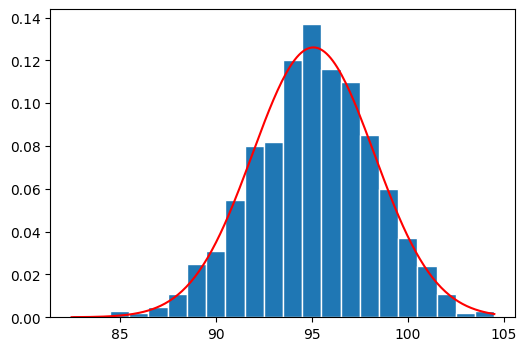

In [10]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import random

trials = 1000
results = []
for _ in range(trials):

    # YOUR SIMULATION HERE
    birthdays = set()
    for i in range(110):
        birthday = random.randint(1, 365)
        birthdays.add(birthday)

    results.append(len(birthdays))


# YOUR ANSWERS FROM (a) AND (b) HERE
mean = 365 * ( 1 - (364/365)**110)
var = 10.019040119622225

# Make a plot. (You shouldn't have to modify this code.)
plt.figure(figsize=(6, 4))
bins = np.arange(min(results), max(results)+2)-0.5
plt.hist(results, bins=bins, edgecolor='white', density=True)
x = np.linspace(bins[0], bins[-1], 200)
plt.plot(x, sts.norm.pdf(x, mean, var**0.5), 'r-')
plt.show()

# Breakout problem

###Secret Santa


Each of 
$n≥2$ people puts his or her name on a slip of paper (no two have the same name). The slips of paper are shuffled in a hat, and then each person draws one (uniformly at random at each stage, without replacement).



(a) Find the standard deviation of the number of people who draw their own names.

In [11]:
'''
Reminder: SD is sqrt of variance
X - the r.v. of the # of people who draw their own names 
Ij = 1 is their own name, 0 otherwise 
E(Ij) = 1 / n = P(x) 
E(X) = n * (1/n) 

Var(Ij) = 1/n - (1/n)**2
Cov(Ij, Ii) 
= E(Ij, Ii) - E(Ij) * E(Ii)
= E(Ij, Ii) - (1/n) ** 2
= 1/n * 1/(n - 1) - (1/n)**2

Var(X) = n * Var(Ij) + 2 * nC2 * Cov(Ij, Ii)
= n * (1/n - (1/n)**2) + n * (n - 1) * (1/n * 1/(n - 1) - (1/n)**2)
= 1 - 1/n + (1 - (n - 1)/n)
= 1 - 1/n + 1/n
= 1

'''

# Write your answer as a number. For example, answer = 1. 

answer = 1

(b) Write a simulation to check your answer to (a).



In [13]:
import numpy as np

n = 20

trials = 1000
results = []
for i in range(trials):

    # TASK: Generate a random order of names
    names = [i for i in range(n)]
    np.random.shuffle(names)
    # TASK: Count how many people got their own name
    count = sum([i == names[i] for i in range(n)])

    results.append(count)

print('Standard deviation:', np.std(results))

Standard deviation: 0.9708532329863253


###Random triangle


A random triangle is formed in some way, such that the angles are identically distributed.



(a) What is the correlation between two of the angles (assuming that the variance of the angles is nonzero)?



Hint: You might want to do part (b) first if you're stuck. Use the simulation there to give you a hint about what the answer to (a) should be.

In [2]:
"""
E(A) = E(B) = E(C) = pi/3
Corr(A, B) = Cov(A, B)/sqrt(Var(A), Var(B))
Var(A) = Var(B) = E(A^2) - E(A)^2 = E(A^2) - pi^2/9
Cov(A, B) 
= E(A, B) - E(A)E(B)
= E(A, B) - pi^2/9

E((A + B + C)^2) = pi^2
E(A^2) + E(B^2) + E(C^2) + 2E(A, B) + 2E(B, C) + 2E(A, C) = pi^2
6E(A, B) + 3E(A^2) = pi^2
E(A, B) = pi^2/6 - E(A^2)/2

Corr(A, B) = Cov(A, B)/ sqrt(Var(A) * Var(B))
= Cov(A, B)/ sqrt(Var(A)**2)
= Cov(A, B)/Var(A)
= (E(A, B) - pi^2/9)/(E(A^2) - pi^2/9)
= (pi^2/6 - E(A^2)/2 - pi^2/9)/(E(A^2) - pi^2/9)
= (-1/2 * (E(A^2) - pi^2/9))/(E(A^2) - pi^2/9)
= -1/2
"""
ans = -1/2

(b) Confirm your answer to (a) with a simulation by generating 3 i.i.d. Uniform(0, 1) random values, dividing them by their sum and multiplying by 
$π$ to get 3 identically distributed random values that add up to 
$π$ and can therefore be considered the interior angles of a triangle.

In [47]:
# Write your simulation here. Generate lots of values for A and B and use
# np.corrcoef(A, B) on two arrays A and B to compute the 2 x 2 correlation
# matrix between the arrays. The diagonal 

import numpy as np

# TASK: Generate random values and compute their correlation
A = []
B = []
trials = 100000
for _ in range(trials):
    a, b, c = np.random.rand(3)
    sum_val = a + b + c
    a = (a/sum_val) * np.pi
    b = (b/sum_val) * np.pi
    A.append(a)
    B.append(b)


print('Corr(A,B) =', np.corrcoef(A, B)[0,1])
print('Correlation matrix:\n', np.corrcoef(A, B))

Corr(A,B) = -0.5003244945231176
Correlation matrix:
 [[ 1.         -0.50032449]
 [-0.50032449  1.        ]]


###Transformed r.v.


Let $U∼Uniform(−1,1)$ and 
$V=2∣U∣−1$.



(a) Find the distribution of
$V$. Give the PDF and, if it is a named distribution we have studied, its name and parameters.



Hint: Find the support of
$V$, and then find the CDF of 
$V$ by reducing 
$P(V≤v)$ to probability calculations about 
$U$.

In [1]:
'''
P(V < v) 
= P(2 |U| - 1 < v)
= P(|U| < (v + 1)/2)
= P( -(v + 1)/2 < U < (v + 1)/2)
= F_U((v + 1)/2) - F_U((-v - 1)/2)
= 1/2 * (v + 1)/2 - 1/2 * (-v - 1)/2
= (v + 1)/2
=> PDF = 1/2
=> V ~ Unif(-1, 1)
'''
ans = 1/2

(b) Show that 
$U$ and $V$ are uncorrelated, but not independent. This is also another example illustrating the fact that knowing the marginal distributions of two r.v.s does not determine the joint distribution.

In [ ]:
"""
U and V are not independent because V = 2|U| - 1

Cov(U, V) = E(UV) - E(U)E(V)
E(V) = E(U) = 0
E(UV) = E(U ( 2|U| - 1)) = E(2U|U| - U) = E(2U|U|) - E(U)
= E(-2U^2|U < 0)P(U < 0) + E(2U^2|U > 0)P(U > 0) - 0
= integral(- 2 * (1/2)**2)(from -1 to 0) * 1/2 + integral(2 * (1/2)**2)(from 0 to 1)
= -1/2 + 1/2 = 0
Hence Cov(U, V) = 0
"""